# Time lag check on Level-0 fluxes

In [2]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import pandas as pd

from diive.core.plotting.plotfuncs import default_format
from diive.pkgs.analyses.histogram import Histogram
from diive.core.io.files import load_parquet

# pd.options.display.width = None
# pd.options.display.max_columns = None
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [3]:
# Source folders parquet
SOURCEFILE = r"..\0_data\OPENLAG-IRGA-Level-0_fluxnet_2024-2025.05\FLUXES_L0_ALL.parquet"
df = load_parquet(filepath=SOURCEFILE)

Loaded .parquet file ..\0_data\OPENLAG-IRGA-Level-0_fluxnet_2024-2025.05\FLUXES_L0_ALL.parquet (0.589 seconds).
    --> Detected time resolution of <30 * Minutes> / 30min 


In [4]:
df

,AIR_MV,AIR_DENSITY,AIR_RHO_CP,AIR_CP,AOA_METHOD,AXES_ROTATION_METHOD,BOWEN,BURBA_METHOD,BADM_LOCATION_LAT,BADM_LOCATION_LONG,BADM_LOCATION_ELEV,BADM_HEIGHTC,BADM_INST_SAMPLING_INT,BADM_INST_AVERAGING_INT,BADM_INST_MODEL_SA,BADM_INST_HEIGHT_SA,BADM_INST_SA_WIND_FORMAT,BADM_INST_SA_GILL_ALIGN,BADM_SA_OFFSET_NORTH,BADM_INST_MODEL_GA_CO2,BADM_INSTPAIR_NORTHWARD_SEP_GA_CO2,BADM_INSTPAIR_EASTWARD_SEP_GA_CO2,BADM_INSTPAIR_HEIGHT_SEP_GA_CO2,BADM_INST_GA_CP_TUBE_LENGTH_GA_CO2,BADM_INST_GA_CP_TUBE_IN_DIAM_GA_CO2,...,W_NONE_MEAS_COV,W_T_SONIC_COV_IBROM,W_T_SONIC_COV_IBROM_N1626,W_T_SONIC_COV_IBROM_N0614,W_T_SONIC_COV_IBROM_N0277,W_T_SONIC_COV_IBROM_N0133,W_T_SONIC_COV_IBROM_N0065,W_T_SONIC_COV_IBROM_N0032,W_T_SONIC_COV_IBROM_N0016,W_T_SONIC_COV_IBROM_N0008,W_T_SONIC_COV_IBROM_N0004,W_NUM_SPIKES,WD_FILTER_NREX,W_SPIKE_NREX,W_ABSLIM_NREX,W_VM97_TEST,W_LGD,W_KID,W_ZCD,W_ITC,W_ITC_TEST,WBOOST_APPLIED,WPL_APPLIED,ZL,ZL_UNCORR
TIMESTAMP_MIDDLE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-02-06 19:15:00,0.024925,1.16151,1172.76,1009.69,0.0,1.0,10.891900,0.0,47.4189,8.49131,527.0,1.5,20.0,30.0,NaN,4.5,NaN,NaN,0.0,NaN,14.0,31.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,0.0,12.0,0.0,800001111.0,0.0,14.19660,553.0,0.0,1.0,0.0,1.0,0.183948,0.183832
2024-02-06 19:45:00,0.024887,1.16327,1174.52,1009.67,0.0,1.0,-6.056420,0.0,47.4189,8.49131,527.0,1.5,20.0,30.0,NaN,4.5,NaN,NaN,0.0,NaN,14.0,31.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,0.0,50.0,0.0,800001111.0,0.0,34.68890,1367.0,147.0,6.0,0.0,1.0,15.713200,14.966900
2024-02-06 20:15:00,0.024873,1.16394,1175.18,1009.65,0.0,1.0,-78.943400,0.0,47.4189,8.49131,527.0,1.5,20.0,30.0,NaN,4.5,NaN,NaN,0.0,NaN,14.0,31.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,9.0,0.0,800000111.0,0.0,6.19836,1869.0,46.0,3.0,0.0,1.0,0.241629,0.240051
2024-02-06 20:45:00,0.024854,1.16486,1176.07,1009.62,0.0,1.0,-70.254600,0.0,47.4189,8.49131,527.0,1.5,20.0,30.0,NaN,4.5,NaN,NaN,0.0,NaN,14.0,31.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,800000111.0,0.0,6.21726,2925.0,47.0,3.0,0.0,1.0,0.299208,0.297071
2024-02-06 21:15:00,0.024843,1.16534,1176.53,1009.60,0.0,1.0,41.320200,0.0,47.4189,8.49131,527.0,1.5,20.0,30.0,NaN,4.5,NaN,NaN,0.0,NaN,14.0,31.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,800000011.0,0.0,5.81718,3679.0,29.0,2.0,0.0,1.0,1.793680,1.762830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-01 22:45:00,0.025357,1.14103,1158.98,1015.73,0.0,1.0,0.476248,0.0,47.4189,8.49131,527.0,1.5,20.0,30.0,NaN,4.5,NaN,NaN,0.0,NaN,14.0,31.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,800000011.0,0.0,6.96959,3626.0,14.0,1.0,0.0,1.0,0.921111,0.987634
2025-06-01 23:15:00,0.025339,1.14183,1159.71,1015.66,0.0,1.0,-0.093278,0.0,47.4189,8.49131,527.0,1.5,20.0,30.0,NaN,4.5,NaN,NaN,0.0,NaN,14.0,31.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,800000011.0,0.0,6.79647,4180.0,30.0,2.0,0.0,1.0,0.551201,0.254533
2025-06-01 23:45:00,0.025339,1.14180,1160.04,1015.97,0.0,1.0,-0.073953,0.0,47.4189,8.49131,527.0,1.5,20.0,30.0,NaN,4.5,NaN,NaN,0.0,NaN,14.0,31.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,800000011.0,0.0,5.84279,735.0,31.0,3.0,0.0,1.0,0.107364,0.028980


In [5]:
tlag_cols = [c for c in df.columns if "TLAG" in c]
tlag_cols

['CO2_TLAG_ACTUAL',
 'CO2_TLAG_USED',
 'CO2_TLAG_NOMINAL',
 'CO2_TLAG_MIN',
 'CO2_TLAG_MAX',
 'CH4_TLAG_ACTUAL',
 'CH4_TLAG_USED',
 'CH4_TLAG_NOMINAL',
 'CH4_TLAG_MIN',
 'CH4_TLAG_MAX',
 'H2O_TLAG_ACTUAL',
 'H2O_TLAG_USED',
 'H2O_TLAG_NOMINAL',
 'H2O_TLAG_MIN',
 'H2O_TLAG_MAX',
 'NONE_TLAG_ACTUAL',
 'NONE_TLAG_USED',
 'NONE_TLAG_NOMINAL',
 'NONE_TLAG_MIN',
 'NONE_TLAG_MAX',
 'VM97_TLAG_HF',
 'VM97_TLAG_SF']

In [5]:
# # Check min lags CO2
# tlag_min_cols = [c for c in tlag_cols if c.endswith("_MIN")]
# tlag_min_cols = [c for c in tlag_cols if "CO2" in c]
# tlag_min = df[tlag_min_cols].copy()
# for c in tlag_min.columns:
#     tlag_min[c].plot(x_compat=True, title=c)
#     plt.show()

# # Check max lags
# tlag_max_cols = [c for c in tlag_cols if c.endswith("_MAX")]
# tlag_max_cols = [c for c in tlag_cols if "CO2" in c]
# tlag_max = df[tlag_max_cols].copy()
# for c in tlag_max.columns:
#     tlag_max[c].plot(x_compat=True, title=c)
#     plt.show()

In [9]:
tlag_actual_cols = [c for c in tlag_cols if c.endswith("_ACTUAL")]
# locs = (df.index.year == 2019) & (df.index.month >= 5)
# locs = df.index.year == 2021
# locs = (df.index.year == 2017) | (df.index.year == 2018)
# locs = (df.index.year == 2017) & (df.index < "2017-03-15 23:59:00")
# locs = (df.index.year == 2019) & ((df.index > "2019-02-17 23:59:00") & (df.index <= "2019-04-30 23:59:00"))
# locs = (
#         ((df.index > "2019-01-01 23:59:00") & (df.index < "2019-02-18 07:00:00")) |
#         ((df.index > "2019-05-01 07:00:00") & (df.index < "2019-05-22 07:00:00"))
# )
# locs = (df.index > "2020-02-28 23:59:00") & (df.index < "2020-05-13 07:00:00")
# locs = (df.index > "2021-07-23 23:59:00")
# tlag_actual = df[tlag_actual_cols][locs].copy()
tlag_actual = df[tlag_actual_cols].copy()
first_date = tlag_actual.index[0].date()
last_date = tlag_actual.index[-1].date()

# for c in tlag_actual.columns:
#     tlag_actual[c].plot(x_compat=True, title=c)
#     plt.show()

gases = ['CO2', 'H2O']
# vline1 = 0.05
# vline2 = 0.50
vline1 = 0.70
vline2 = 1.50
startbin = 0
endbin = 10

C:\Users\holukas\AppData\Local\Temp\ipykernel_25356\2847256342.py:64: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  ax2.locator_params(axis='both', nbins=20)
C:\Users\holukas\AppData\Local\Temp\ipykernel_25356\2847256342.py:68: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show();
C:\Users\holukas\AppData\Local\Temp\ipykernel_25356\2847256342.py:64: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  ax2.locator_params(axis='both', nbins=20)
C:\Users\holukas\AppData\Local\Temp\ipykernel_25356\2847256342.py:68: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show();


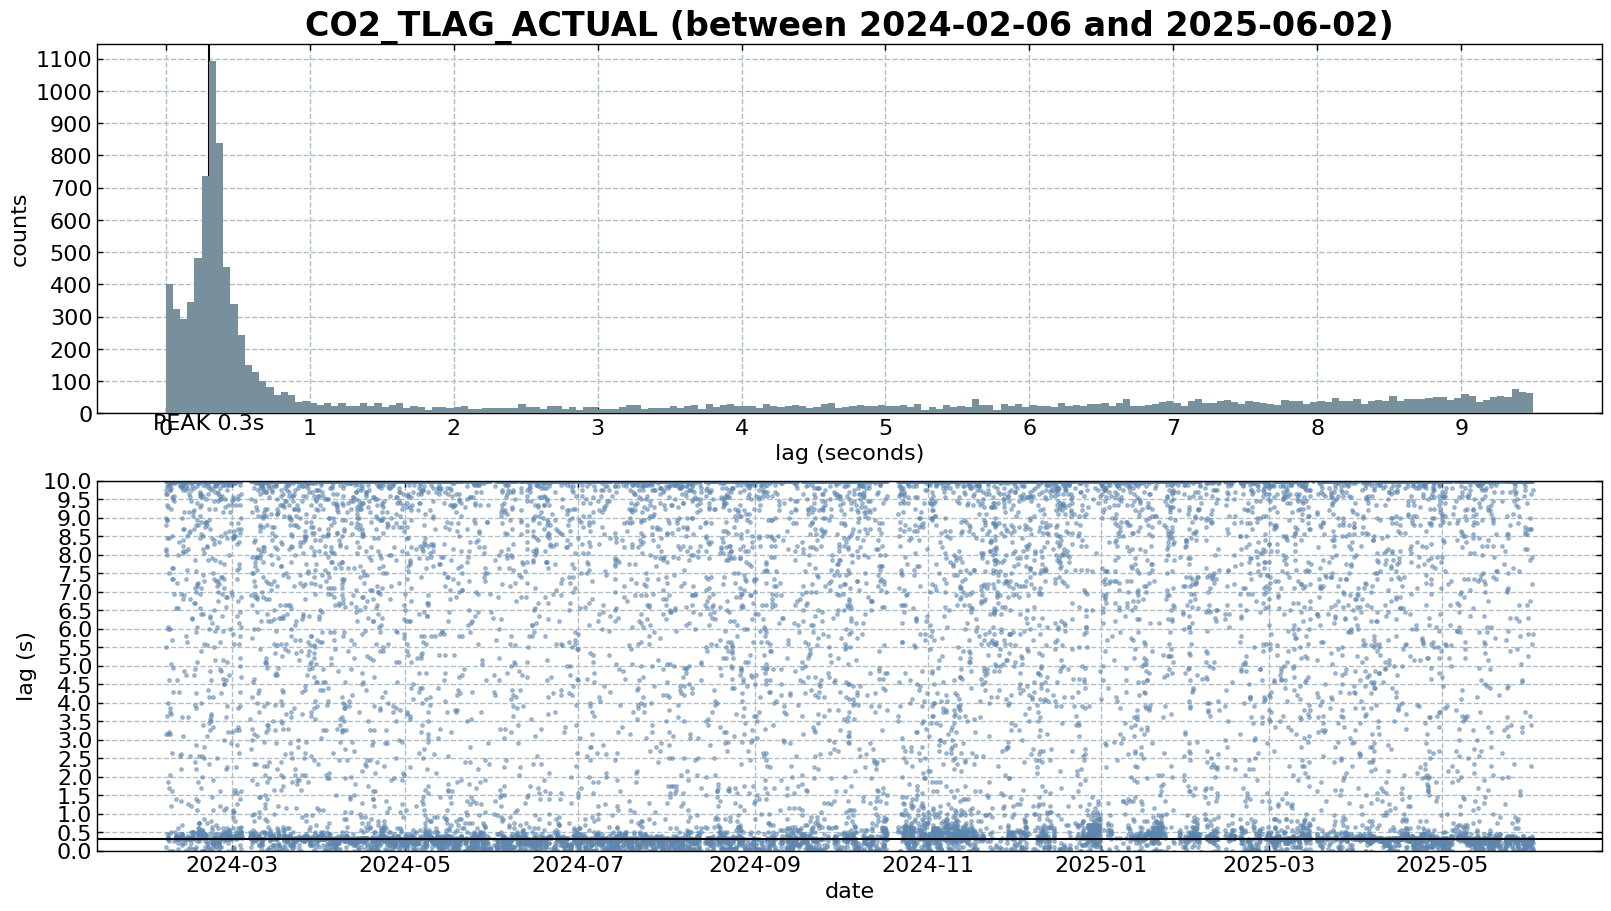

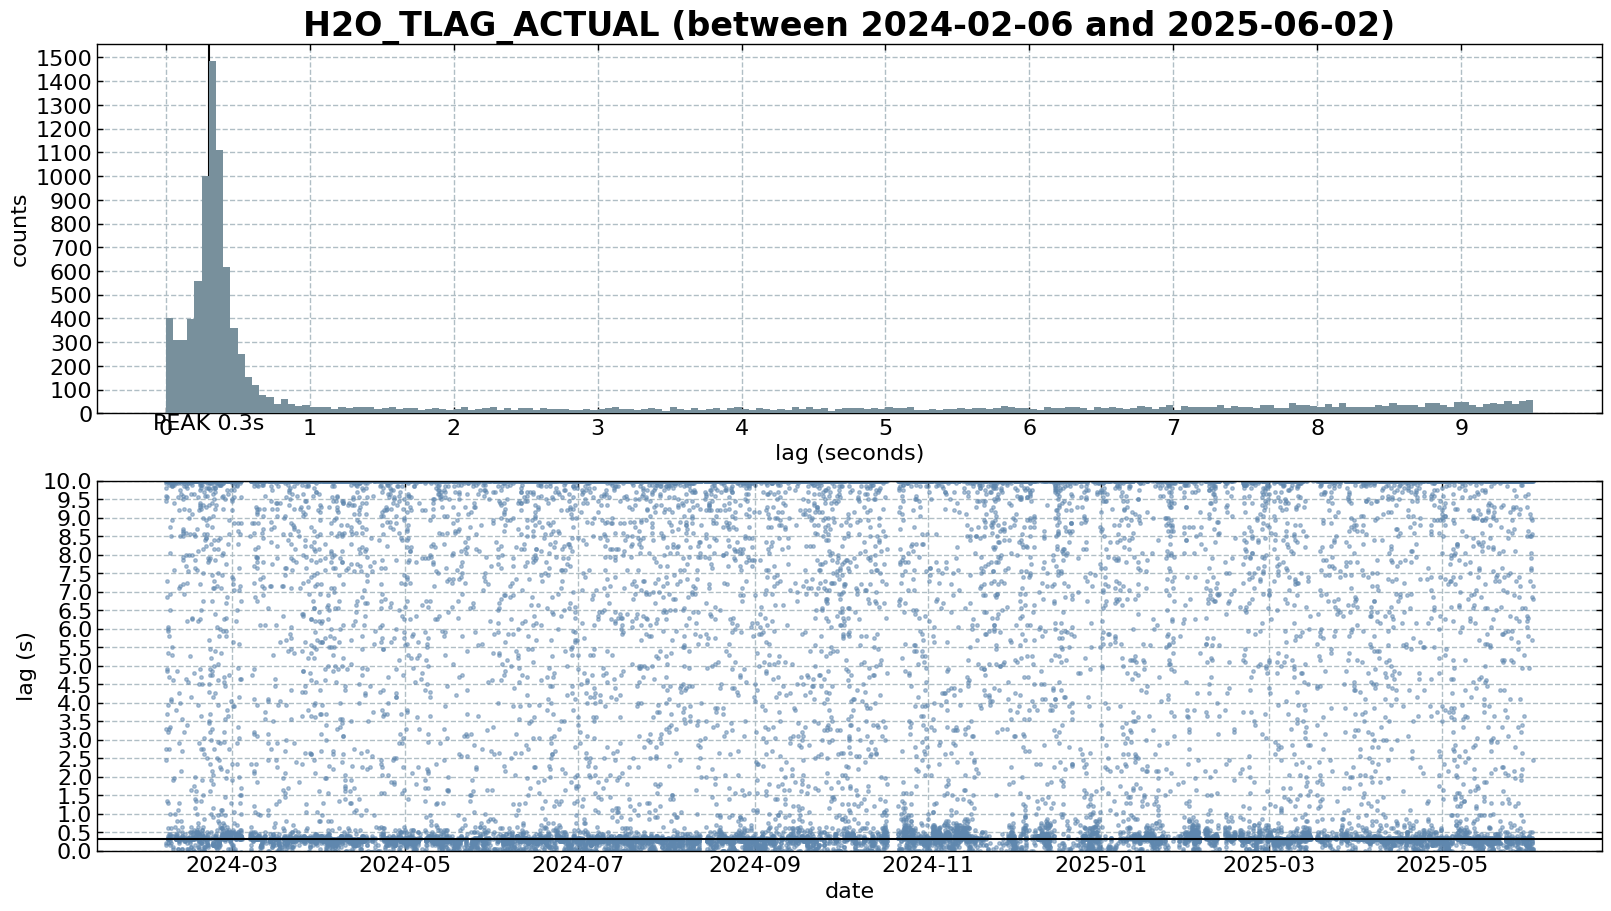

In [12]:
for gas in gases:
    gascol = f'{gas}_TLAG_ACTUAL'
    series = tlag_actual[gascol].copy()

    hist = Histogram(
        s=series,
        method='uniques',
        # n_bins=10,
        # ignore_fringe_bins=None
        ignore_fringe_bins=[5, 10]
    )

    results = hist.results
    peakbins = hist.peakbins

    locs = (results['BIN_START_INCL'] >= startbin) & (results['BIN_START_INCL'] <= endbin)
    results = results[locs].copy()

    gs = gridspec.GridSpec(1, 1)  # rows, cols
    gs.update(wspace=0.3, hspace=0.3, left=0.03, right=0.97, top=0.97, bottom=0.03)

    fig = plt.figure(layout="constrained", facecolor='white', figsize=(16, 9))
    gs = gridspec.GridSpec(2, 1, figure=fig)  # rows, cols
    ax = fig.add_subplot(gs[0, :])
    ax2 = fig.add_subplot(gs[1, :])

    hist_bins = results['BIN_START_INCL'].copy()
    hist_counts = results['COUNTS'].copy()
    bar_width = .05
    # bar_width = (hist_bins[1] - hist_bins[0]) * 1  # Calculate bar width
    args = dict(width=bar_width, align='edge')
    ax.bar(x=hist_bins, height=hist_counts, label='counts', zorder=90, color='#78909c', **args)
    # ax.set_xlim(hist_bins[0], hist_bins[-1])

    ax2.plot(series.index, series, alpha=0.5, c='#5f87ae', marker='.', ms=5, ls='none')

    title = f"{gascol} (between {first_date} and {last_date})"
    ax.set_title(title, fontsize=24, weight='bold')


    peak = peakbins[0]
    ax2.axhline(peak, color="black")

    # ax.axvline(vline1, color="blue")
    # ax.axvline(vline2, color="red")
    # ax2.axhline(vline1, color="blue")
    # ax2.axhline(vline2, color="red")
    # trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)
    # ax.text(vline1, 0.70, f"start {vline1}s",
    #         size=16, color='blue', backgroundcolor='none', transform=trans,
    #         alpha=1, horizontalalignment='right', verticalalignment='top', zorder=999)
    # ax.text(vline2, 0.70, f"end {vline2}s",
    #         size=16, color='red', backgroundcolor='none', transform=trans,
    #         alpha=1, horizontalalignment='left', verticalalignment='top', zorder=999)

    ax.axvline(peak, color="black")
    ax.text(peak, 0.98, f"PEAK {peak}s",
            size=16, color='black', backgroundcolor='none', 
            alpha=1, horizontalalignment='center', verticalalignment='top', zorder=999)

    default_format(ax=ax, ax_xlabel_txt="lag (seconds)", ax_ylabel_txt="counts")
    default_format(ax=ax2, ax_xlabel_txt="date", ax_ylabel_txt="lag (s)")
    ax.locator_params(axis='both', nbins=20)
    ax2.locator_params(axis='both', nbins=20)

    ax2.set_ylim([0, 10])

    fig.show()
